Analista de Pricing

Importar librerías


In [3]:
#Importar librerías

from openai import OpenAI
import os
from dotenv import load_dotenv
import pandas as pd
from pandasai.llm.openai import OpenAI
from pandasai import Agent

Definir API Key

In [4]:
#Establecer API Key mediante dotenv
load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

Crear DataFrame de ejemplo sobre como funcionará el proyecto

In [4]:
data = {
    "Producto": ["Chocolate", "Caramelo", "Gomita", "Dulce", "Alfajor"],
    "Intercanal": [95.2, 118.0, 110.5, 104.3, 86.7],     # Entre 80% y 120%
    "Price Index": [85.4, 82.0, 110.3, 101.0, 104.8],   # Entre 80% y 115%
    "EBITDA": [3.1, 12.5, 8.7, 2.9, 14.2],              # Hasta 15%
    "Avance Ventas": [25.0, 45.2, 60.1, 38.5, 72.3]     # Entre 0% y 100%
}

# Crear DataFrame
df = pd.DataFrame(data)
df.head

<bound method NDFrame.head of     Producto  Intercanal  Price Index  EBITDA  Avance Ventas
0  Chocolate        95.2         85.4     3.1           25.0
1   Caramelo       118.0         82.0    12.5           45.2
2     Gomita       110.5        110.3     8.7           60.1
3      Dulce       104.3        101.0     2.9           38.5
4    Alfajor        86.7        104.8    14.2           72.3>

Establecer el producto del cual se quiere obtener el análisis


In [6]:
producto = "Gomita"

In [7]:
df_filtrado = df[df["Producto"] == producto]
df_filtrado.head()

,Producto,Intercanal,Price Index,EBITDA,Avance Ventas
2,Gomita,110.5,110.3,8.7,60.1


In [6]:
fila = df[df["Producto"] == producto].iloc[0]

# Convertir todos los valores en un string
info_producto = f"""Producto: {fila["Producto"]}, Intercanal: {fila["Intercanal"]}%, Price Index: {fila["Price Index"]}%, EBITDA: {fila["EBITDA"]}%, Avance de Ventas: {fila["Avance Ventas"]}%"""

print(info_producto)


Producto: Gomita, Intercanal: 110.5%, Price Index: 110.3%, EBITDA: 8.7%, Avance de Ventas: 60.1%


Definición del System y User del modelo

In [8]:
conversation = [
    {"role": "system", "content": "Eres un analista de Pricing de una empresa de consumo masivo alimenticio retail del mercado de golosinas"},
    {"role": "user", "content": f"Dame un breve análisis de la situación del producto en dos párrafos de no más de 200 palabras. Aquí están los datos: {info_producto}"}
]


Realizar consulta

In [9]:
respuesta = client.chat.completions.create(
    model= "gpt-4o-mini",
    messages= conversation,
    max_tokens=200,
    temperature=0.5,
)

Imprimir mensaje con el análisis de Pricing


In [10]:
message = respuesta.choices[0].message

print(message.content)

El análisis del producto "Gomita" revela una situación competitiva sólida en el mercado de golosinas. Con un intercanal del 110.5% y un price index de 110.3%, se evidencia que el producto no solo está bien posicionado en comparación con la competencia, sino que también está logrando mantener precios que reflejan su valor percibido. Estos índices sugieren que los consumidores están dispuestos a pagar un precio superior por la calidad o la marca de la gomita, lo que es un buen indicador de lealtad y satisfacción del cliente.

Sin embargo, el EBITDA del 8.7% indica que, aunque el producto está generando ingresos, los márgenes de beneficio podrían ser un área de preocupación. Con un avance de ventas del 60.1%, es crucial monitorear las tendencias de consumo y la respuesta del mercado para asegurar que la rentabilidad no se vea afectada en el futuro. La empresa debería considerar estrategias de optimización


Texto a Imagen: Configurar la API de Pandas AI utilizando la misma API de Open AI


In [ ]:
#Cargar la API Key
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

# Reutilizar la clave que ya cargaste
openai_api_key = os.getenv("OPENAI_API_KEY")

# Crear el modelo LLM de PandasAI con OpenAI
llm = OpenAI(api_token=openai_api_key)

# Crear el agente con tu DataFrame
agent = Agent(df, config={
    "llm": llm,
    "max_tokens": 500  # Ajustá este valor según el modelo que estés usando
})

Modificar el dataframe para que sea bien detectado por Pandas AI

In [8]:
# Convertir 'Producto' a string
df['Producto'] = df['Producto'].astype(str)

# Convertir el resto de las columnas a float
for col in df.columns:
    if col != 'Producto':
        df[col] = df[col].astype(float)


Solicitar un gráfico a Pandas AI del dataframe modificado sobre el KPI "Intercanal"

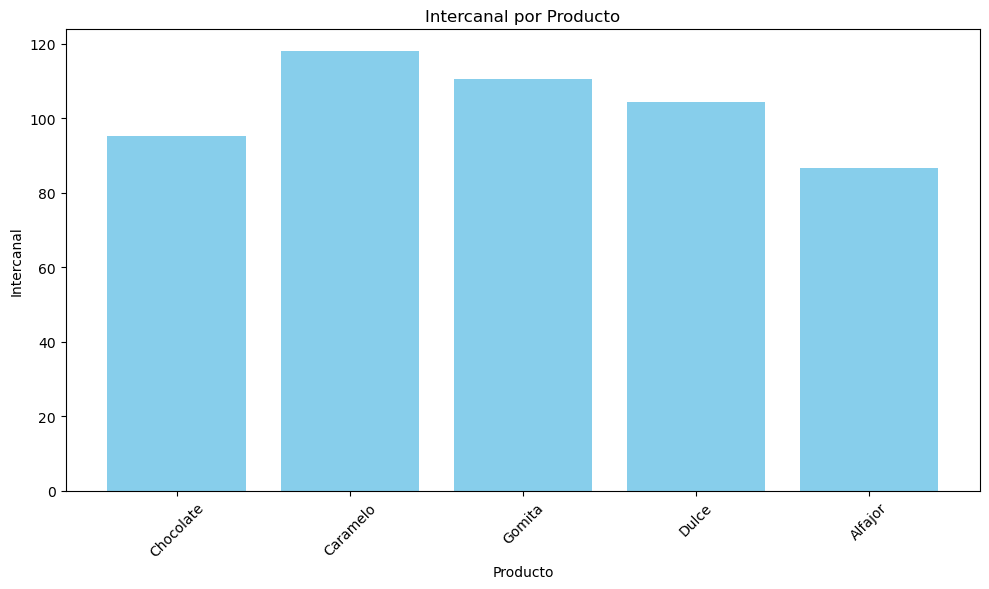

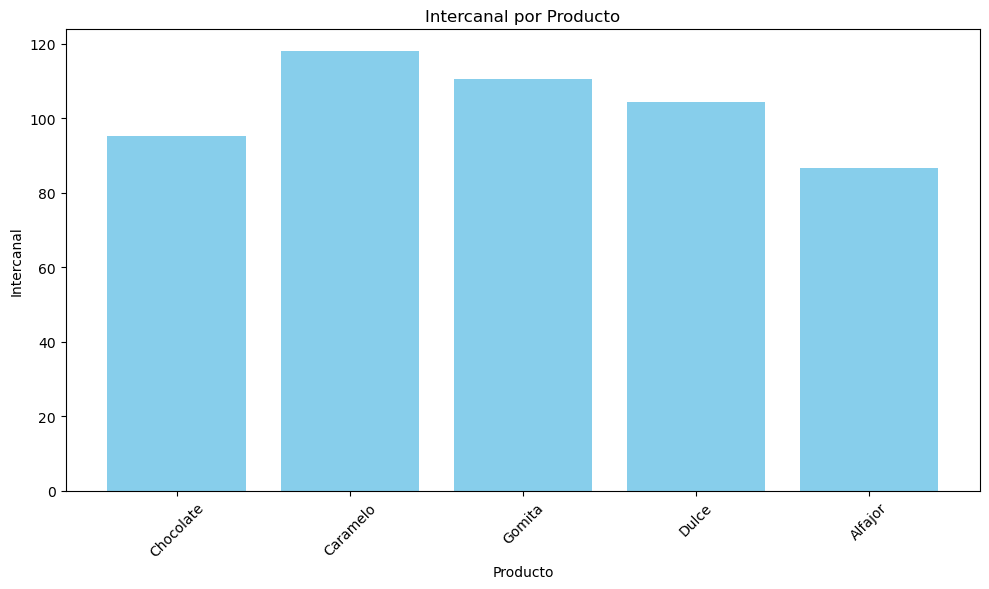

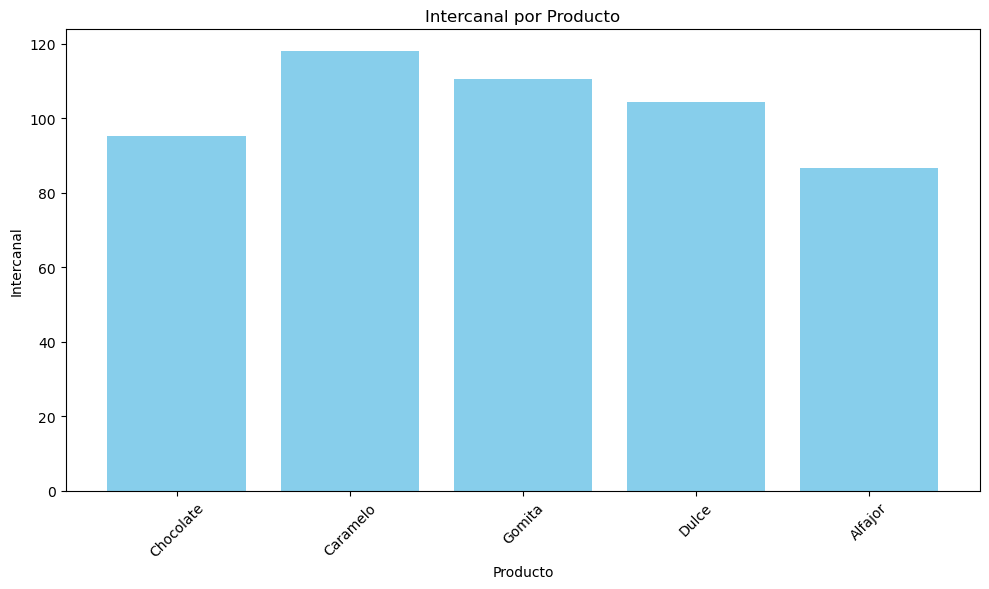

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")


In [ ]:
respuesta_pandas = agent.chat("Genera y muestra un gráfico de barras del campo 'intercanal' agrupado por los distintos productos. El resultado debe ser un gráfico.")

Hacer consulta al agente de PandasAI para hacer un gráfico sobre el KPI de "Avance Ventas"

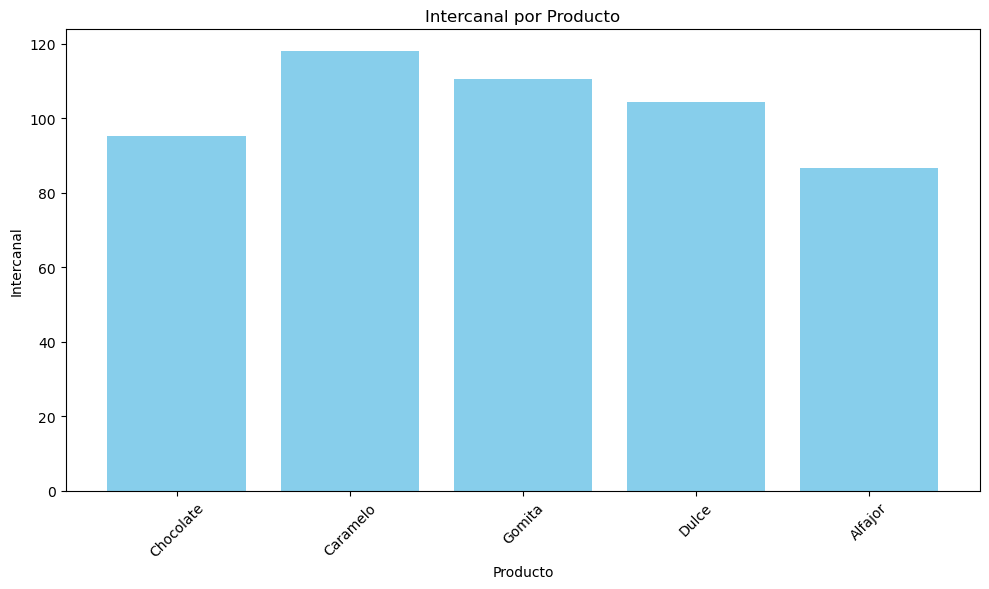

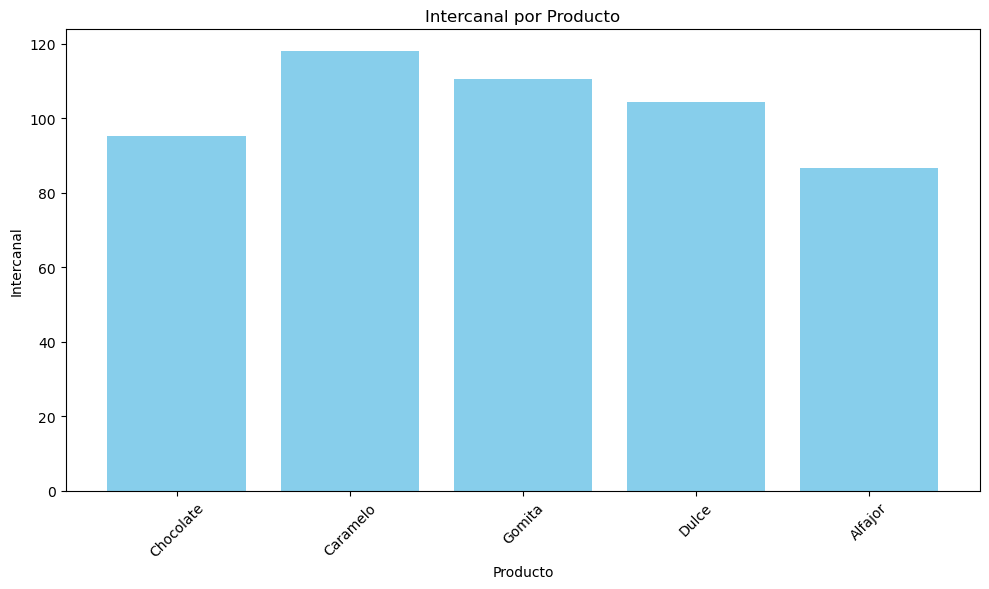

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")


In [26]:
respuesta_pandas_2 = agent.chat("Genera y muestra un gráfico de barras del campo 'Avance Ventas' donde se muestren todos los productos. El resultado debe ser un gráfico.")


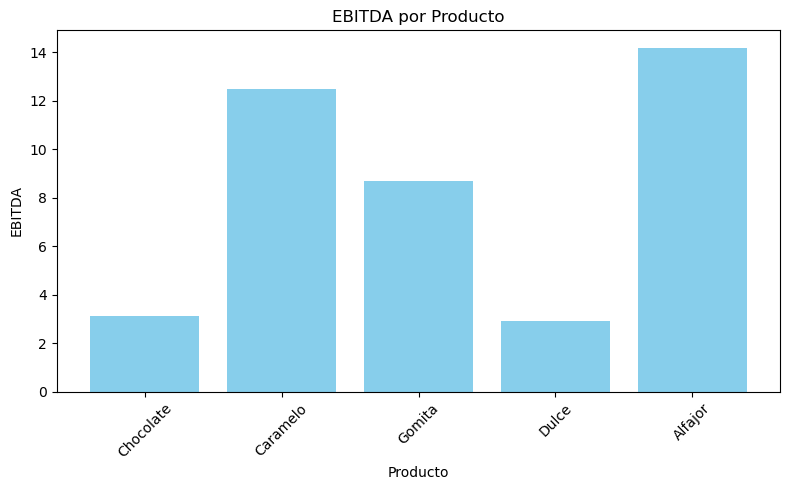

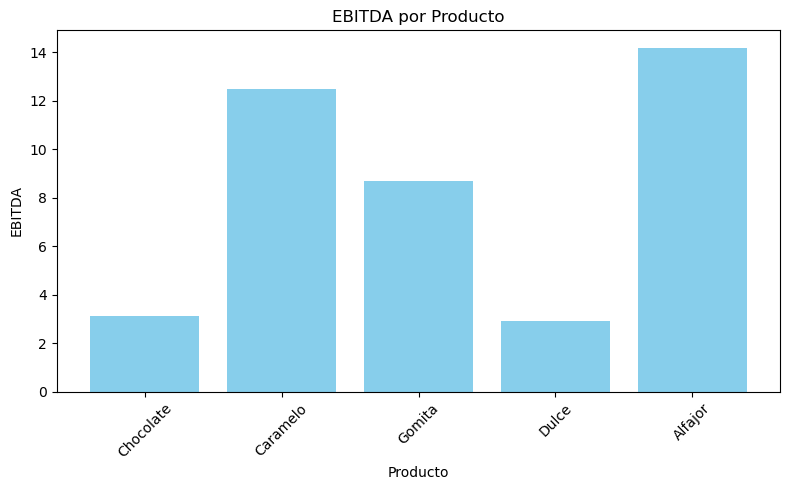

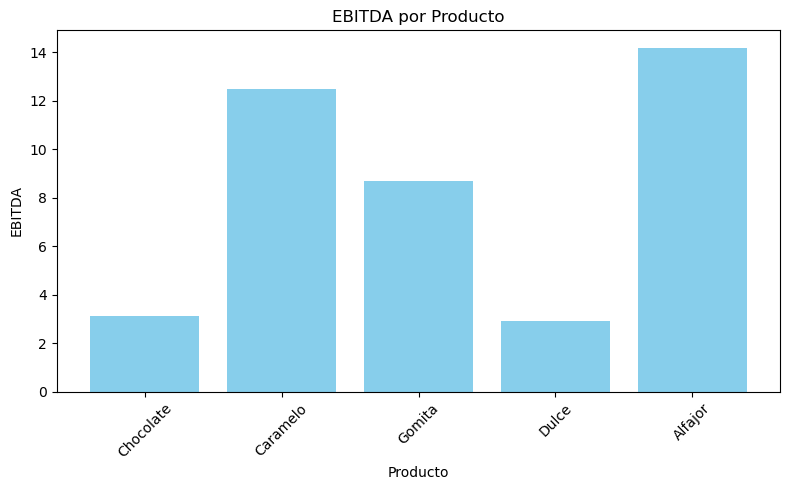

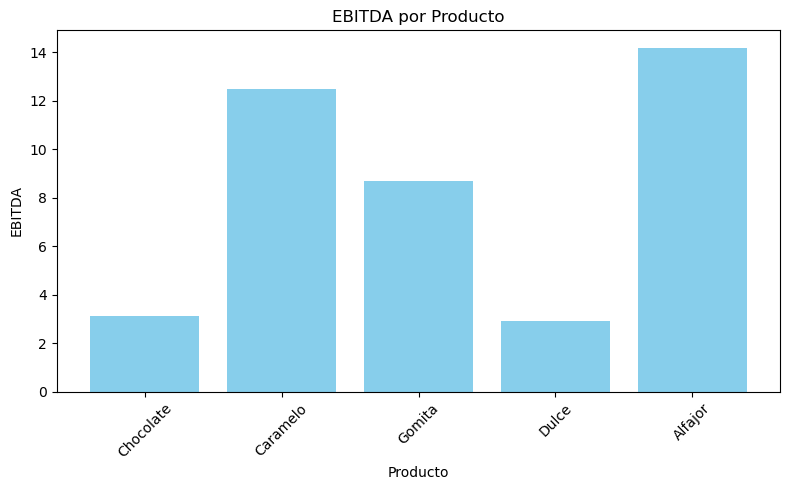

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")


In [ ]:
respuesta_pandas_3 = agent.chat("Genera y muestra un gráfico de barras del EBITDA por producto. El resultado debe ser un gráfico.")

Hacer una consulta a Pandas AI sobre el KPI de "EBITDA"

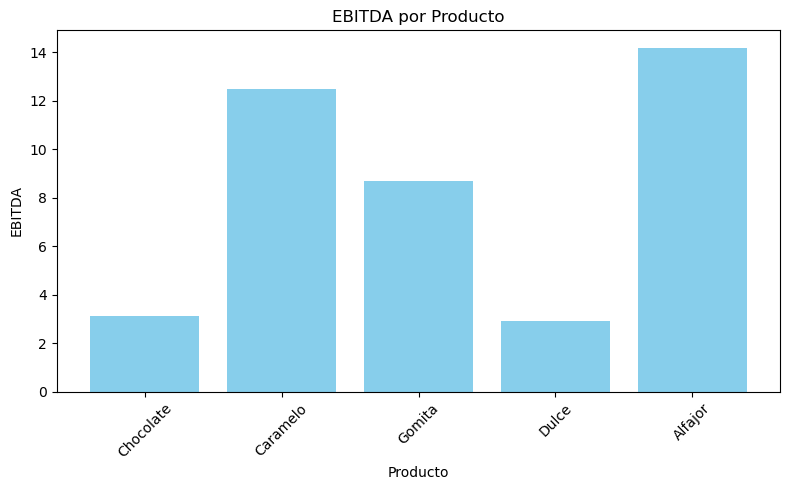

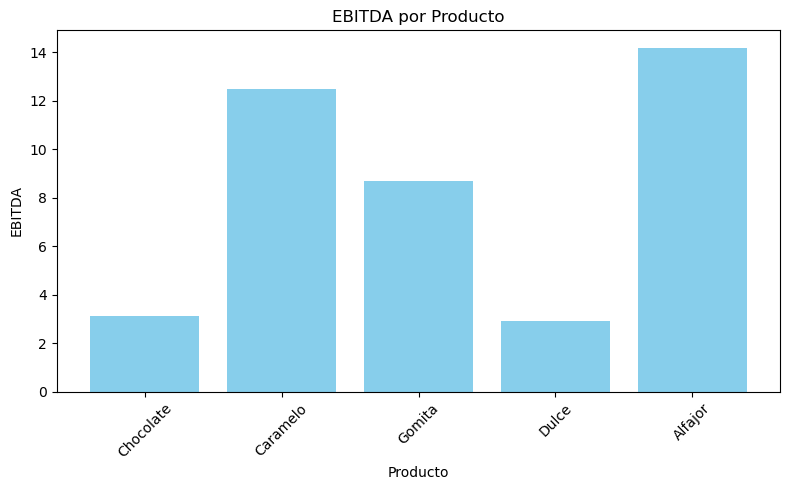

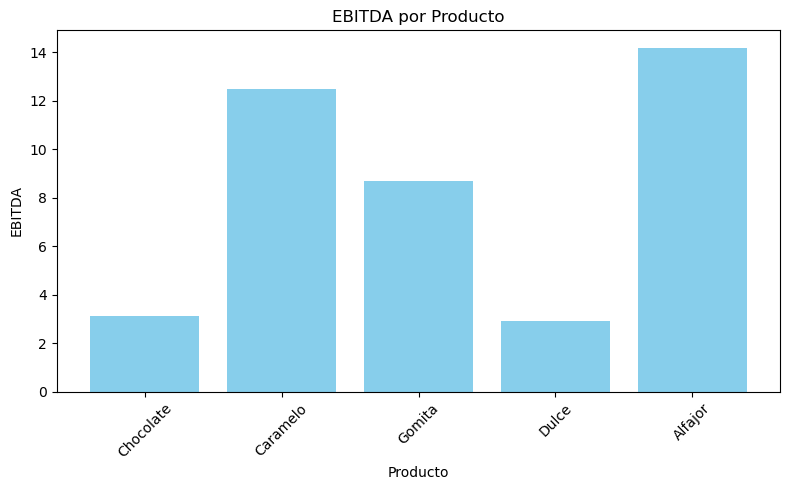

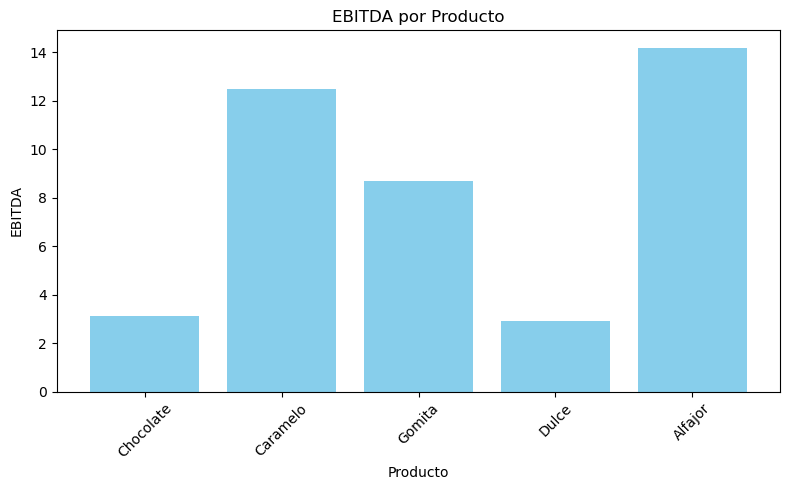

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")


In [29]:
respuesta_pandas_3 = agent.chat("Genera y muestra un gráfico de barras del EBITDA por producto.")
